<h2>Seminar 2020 - MultiThread & Pandas</h2>

In [1]:
### import section ###
from Utils.Preprocess import Preprocess
from Algorithm.ThreadManager import ThreadManager
from Utils.Log import writer, logger
from Utils.FileUtils import FileUtils
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
%matplotlib inline
# change logger severity
logger.set_logger_severity('info')

2020-03-09 23:29:21,007 CONFIGDIR=C:\Users\roy\.matplotlib
2020-03-09 23:29:21,010 matplotlib data path: c:\users\roy\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data
2020-03-09 23:29:21,014 loaded rc file c:\users\roy\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\matplotlibrc
2020-03-09 23:29:21,015 matplotlib version 3.2.0
2020-03-09 23:29:21,015 interactive is False
2020-03-09 23:29:21,015 platform is win32
2020-03-09 23:29:21,015 loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'types', 'importlib', 'importlib._bo

2020-03-09 23:29:21,059 CACHEDIR=C:\Users\roy\.matplotlib
2020-03-09 23:29:21,067 Using fontManager instance from C:\Users\roy\.matplotlib\fontlist-v310.json
2020-03-09 23:29:21,240 Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-03-09 23:29:21,244 Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-03-09 23:29:21,248 Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-03-09 23:29:21,248 Change level from DEBUG to INFO


In [2]:
headers = ['Id', 'OverallQual', 'YearBuilt', 'OverallCond', 'OpenPorchSF']
df1 = FileUtils.read_data_frame_from_path('Data/train_1.csv', headers)
df2 = FileUtils.read_data_frame_from_path('Data/train_2.xlsx', headers)
df3 = FileUtils.read_data_frame_from_path('Data/train_targets.csv')
df_total = df1.append(df2).merge(df3, on='Id', how='left').fillna("None")
X_train, X_test, y_train, y_test = Preprocess.split_train_test_by_pandas(df_total, 'SalePrice')

In [3]:
params = [{'model': SVC, "C": 0.4}, {'normalize': False, "fit_intercept": False},
          {'normalize': True, "fit_intercept": False}, {'model': SVC, "degree": 4},
          {'model': LogisticRegression, 'C': 0.6}]
ThreadManager.running_threads_args(X_train, y_train, X_test, y_test, params)
ThreadManager.wait_for_all_threads()
best_result, best_params = ThreadManager.return_best_score()
writer.info(f'The best score is {best_result} with these params: {best_params}')

c:\users\roy\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-03-09 23:29:25,298 The best score is LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) with these params: 7593634692.280822


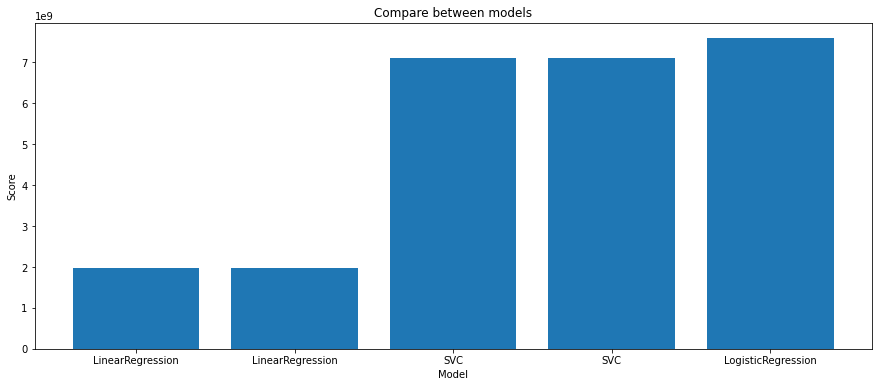

In [4]:
y_label = [item.score for item in ThreadManager.results]
x_label = np.arange(len(y_label))
plt.figure(figsize=(15,6))
models_labels = [str(item.params).split("(")[0] for item in ThreadManager.results]
plt.bar(x_label, y_label)
plt.xticks(range(len(models_labels)), models_labels)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Compare between models")
plt.show()